In [1]:
import pandas as pd
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import manifold,datasets

df = pd.read_csv('trb_vdj_kmer_mhc.csv')
# df = df[df['species'] == 0]
df_vdj = df[['v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3']].fillna(0)
df_mhc = df[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label']]

vdj_lists = df_vdj.values.tolist()
mhc_lists = df_mhc.values.tolist()


/Users/julio/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['antigen.epitope'].nunique()

1106

In [3]:
import ast
cdr3_kmer = df['crd3_encode'].apply(lambda x: ast.literal_eval(x))

In [4]:
tcr_list = []
for cdr3, vdj, mhc in zip(cdr3_kmer, vdj_lists, mhc_lists):
    tcr_list.append(cdr3 + vdj + mhc)
tcr_list[0]

[-0.08052249252796173,
 -1.3491982221603394,
 2.165417194366455,
 1.1816405057907104,
 -1.3901536464691162,
 1.7495988607406616,
 2.1319217681884766,
 2.785444974899292,
 -3.1611857414245605,
 -1.5323046445846558,
 -1.4833745956420898,
 -3.6346628665924072,
 -4.7299418449401855,
 -2.8853373527526855,
 5.2482733726501465,
 0.3202740550041199,
 3.919013738632202,
 5.981078624725342,
 -3.198639154434204,
 2.876141309738159,
 -0.11432736366987228,
 -0.6709185838699341,
 0.9042136669158936,
 0.20645073056221008,
 0.6248069405555725,
 -0.15699432790279388,
 0.11150328069925308,
 0.3357294797897339,
 -0.4060443639755249,
 0.025010017678141594,
 -0.4973335862159729,
 -0.3900582194328308,
 -0.1421525776386261,
 0.6573606729507446,
 0.7767179608345032,
 -0.7962958216667175,
 0.966796338558197,
 -0.12999814748764038,
 0.2060568779706955,
 -0.495603084564209,
 -0.3799554109573364,
 0.03388696536421776,
 -0.2524871230125427,
 0.2899162471294403,
 0.5645607113838196,
 0.05699770152568817,
 0.1645280

In [5]:
antigen_label = df['antigen_label'].tolist()
type(antigen_label)

list

In [6]:
type(tcr_list[0])

list

In [7]:
cdr3_kmer = list(cdr3_kmer)

In [8]:
##########PCA#############

pca = PCA(n_components = 100)
pca_data = pca.fit_transform(list(cdr3_kmer))

# tsne = manifold.TSNE(n_components=50, init='pca', learning_rate=100)
# reduced1_data = tsne.fit_transform(list(cdr3_kmer))

# plt.figure(figsize=(30,20))
# plt.scatter(reduced1_data[:, 0], reduced1_data[:, 1], c = antigen_label, cmap='Spectral',
#             marker='.', s = 20, alpha = 1/4)

In [9]:
# tcr_list = []
# for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
#     tcr_list.append(cdr3 + vdj + mhc)
tcr_list = []
for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
    combined_array = np.concatenate([cdr3, vdj, mhc])
    tcr_list.append(combined_array)


In [10]:
############TSNE##########
tcr_array = np.array(tcr_list)
tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=100)
reduced_data = tsne.fit_transform(tcr_array)

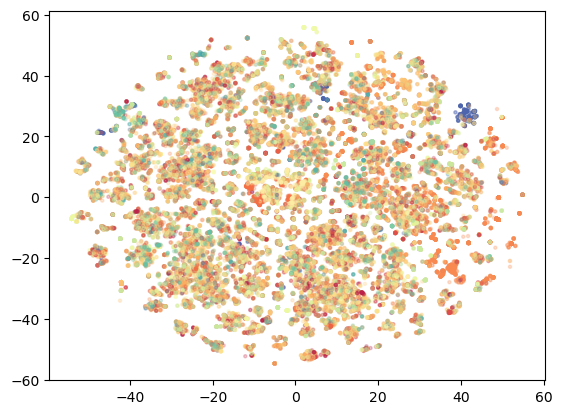

In [11]:
# plt.figure(figsize = (30, 20))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = antigen_label, cmap='Spectral',
            marker='.', s = 20, alpha = 1/4)

In [12]:
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = antigen_label, cmap='Spectral',
#             marker='.', s = 20, alpha = 1/4)

In [13]:
from sklearn.cluster import DBSCAN

dbscan_tsne = DBSCAN(eps=0.5, min_samples=5)
dbscan_tsne_labels = dbscan_tsne.fit_predict(reduced_data)

unique_tsne_labels = np.unique(dbscan_tsne_labels)
print(f"Unique labels found: {unique_tsne_labels}")


Unique labels found: [  -1    0    1 ... 1077 1078 1079]


In [14]:
# labels 1 ～ 10
from sklearn.cluster import DBSCAN
import numpy as np

# Create a dictionary
labels_per_min_samples = {}

for min_samples in range(1, 11):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    unique_labels = np.unique(dbscan_labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    labels_per_min_samples[min_samples] = n_clusters

labels_per_min_samples

{1: 1655,
 2: 1461,
 3: 1282,
 4: 1159,
 5: 1080,
 6: 1027,
 7: 1014,
 8: 988,
 9: 969,
 10: 975}

In [15]:
# silhouette 1～10
from sklearn.metrics import silhouette_score

silhouette_scores_per_min_samples = {}

for min_samples in range(1, 11):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    if len(np.unique(dbscan_labels)) > 1 and np.sum(dbscan_labels != -1) > 1:
        silhouette_score_value = silhouette_score(reduced_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
        silhouette_scores_per_min_samples[min_samples] = silhouette_score_value
    else:
        silhouette_scores_per_min_samples[min_samples] = None

silhouette_scores_per_min_samples


{1: 0.22121638,
 2: 0.25901034,
 3: 0.29107937,
 4: 0.33275342,
 5: 0.37040225,
 6: 0.40925086,
 7: 0.44052938,
 8: 0.47412604,
 9: 0.5077993,
 10: 0.5402068}

In [16]:
# non-noise point 1～10
points_after_noise_removal = {}

for min_samples in range(1, 11):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    n_points_remaining = np.sum(dbscan_labels != -1)
    points_after_noise_removal[min_samples] = n_points_remaining

points_after_noise_removal

{1: 49686,
 2: 49492,
 3: 49134,
 4: 48684,
 5: 48151,
 6: 47582,
 7: 47029,
 8: 46391,
 9: 45681,
 10: 44945}

In [17]:
# labels 5 ～ 100
from sklearn.cluster import DBSCAN
import numpy as np

# Create a dictionary
labels_per_min_samples = {}

for min_samples in range(5, 101, 5):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    unique_labels = np.unique(dbscan_labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    labels_per_min_samples[min_samples] = n_clusters

labels_per_min_samples

{5: 1080,
 10: 975,
 15: 901,
 20: 772,
 25: 582,
 30: 398,
 35: 256,
 40: 168,
 45: 115,
 50: 65,
 55: 34,
 60: 15,
 65: 9,
 70: 5,
 75: 5,
 80: 4,
 85: 4,
 90: 4,
 95: 4,
 100: 3}

In [18]:
# silhouette 5 ～ 100
from sklearn.metrics import silhouette_score

silhouette_scores_per_min_samples = {}

for min_samples in range(5, 101, 5):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    if len(np.unique(dbscan_labels)) > 1 and np.sum(dbscan_labels != -1) > 1:
        silhouette_score_value = silhouette_score(reduced_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
        silhouette_scores_per_min_samples[min_samples] = silhouette_score_value
    else:
        silhouette_scores_per_min_samples[min_samples] = None

silhouette_scores_per_min_samples


{5: 0.37040225,
 10: 0.5402068,
 15: 0.6441233,
 20: 0.71845275,
 25: 0.78676206,
 30: 0.8379468,
 35: 0.87326646,
 40: 0.9072843,
 45: 0.9177465,
 50: 0.9445231,
 55: 0.9550738,
 60: 0.97336566,
 65: 0.97273326,
 70: 0.9877306,
 75: 0.9877306,
 80: 0.9862883,
 85: 0.9862883,
 90: 0.9862883,
 95: 0.9862883,
 100: 0.9923163}

In [19]:
# non-noise point 5～100
points_after_noise_removal = {}

for min_samples in range(5, 101, 5):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    n_points_remaining = np.sum(dbscan_labels != -1)
    points_after_noise_removal[min_samples] = n_points_remaining

points_after_noise_removal


{5: 48151,
 10: 44945,
 15: 40118,
 20: 33845,
 25: 26530,
 30: 19417,
 35: 13796,
 40: 9785,
 45: 7004,
 50: 4304,
 55: 2569,
 60: 1399,
 65: 1000,
 70: 713,
 75: 713,
 80: 638,
 85: 638,
 90: 638,
 95: 638,
 100: 543}

## Change the tsne form 2 to ～

In [20]:
############TSNE##########
tcr_array = np.array(tcr_list)
tsne = manifold.TSNE(n_components=3, init='pca', learning_rate=100)
reduced_data = tsne.fit_transform(tcr_array)

In [21]:
from sklearn.cluster import DBSCAN

dbscan_tsne = DBSCAN(eps=0.5, min_samples=5)
dbscan_tsne_labels = dbscan_tsne.fit_predict(reduced_data)

In [22]:
# labels 5 ～ 100
from sklearn.cluster import DBSCAN
import numpy as np

# Create a dictionary
labels_per_min_samples = {}

for min_samples in range(5, 101, 5):
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(reduced_data)
    unique_labels = np.unique(dbscan_labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    labels_per_min_samples[min_samples] = n_clusters

labels_per_min_samples

{5: 2513,
 10: 1412,
 15: 757,
 20: 382,
 25: 177,
 30: 83,
 35: 34,
 40: 14,
 45: 7,
 50: 7,
 55: 7,
 60: 7,
 65: 6,
 70: 6,
 75: 6,
 80: 5,
 85: 5,
 90: 5,
 95: 1,
 100: 1}

TSNE = 2 is best